### Cross validation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. Iris 데이터셋 로드
data = load_iris()
X, y = data.data, data.target

# 2. Decision Tree 모델 생성
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# 3. 5-Fold Cross Validation 수행
cv_scores = cross_val_score(tree_clf, X, y, cv=5, scoring='accuracy')

# 4. 결과 출력
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Cross-Validation Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean Accuracy: 0.9533
Standard Deviation: 0.0340


Cross-Validation Scores: [0.93 0.96 0.96 0.97 0.99 0.98 0.93 0.96 0.97 0.95]
Mean Accuracy: 0.9600
Standard Deviation: 0.0184


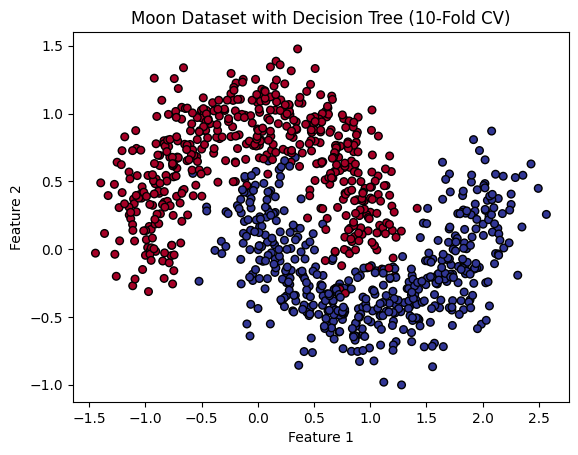

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# 1. Moon 데이터셋 생성
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# 2. Decision Tree 모델 생성
tree_clf = DecisionTreeClassifier(random_state=42)

# 3. 10-Fold Cross Validation 수행
cv_scores = cross_val_score(tree_clf, X, y, cv=10, scoring='accuracy')

# 4. 결과 출력
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

# 5. 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=30)
plt.title("Moon Dataset with Decision Tree (10-Fold CV)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### 군집화와 K-means

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.1]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

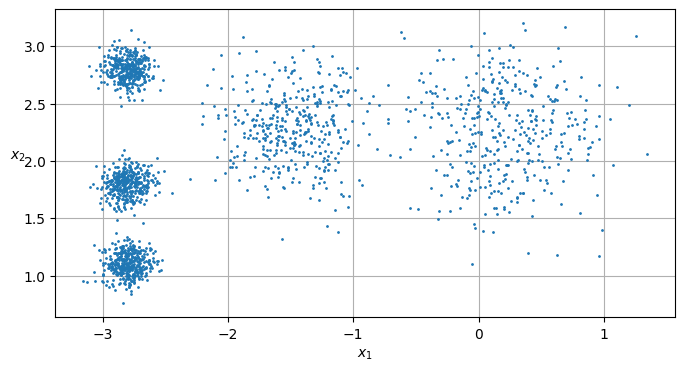

In [ ]:
import matplotlib.pyplot as plt
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [ ]:
y_pred

array([1, 4, 0, ..., 2, 0, 4], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80052143,  1.10046968],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80374386,  1.79979459]])

In [ ]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 2, 2], dtype=int32)

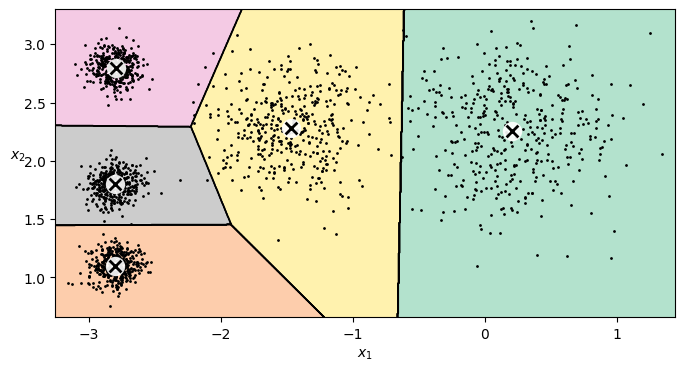

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()


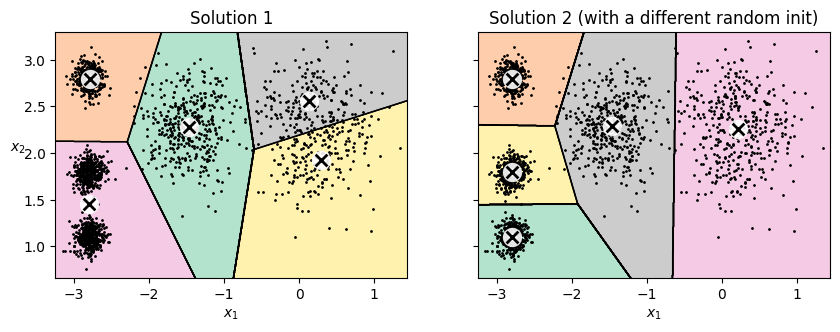

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")

plt.show()

In [ ]:
kmeans.inertia_

211.80447602862358

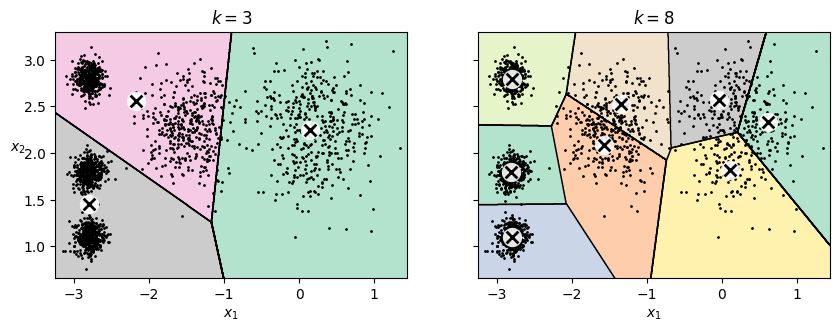

In [ ]:
# extra code – this cell generates and saves Figure 9–7

kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [ ]:
kmeans_k3.inertia_

701.1778607477621

In [ ]:
kmeans_k8.inertia_

118.5756334827109

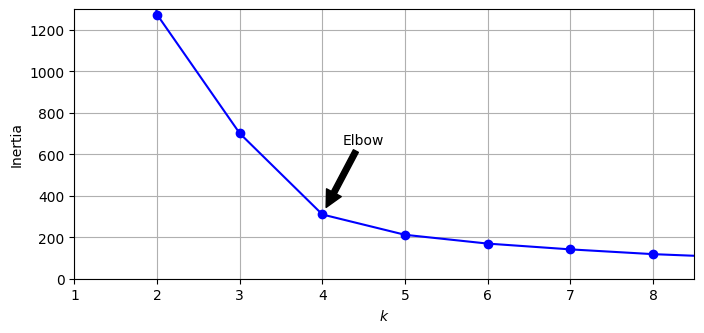

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

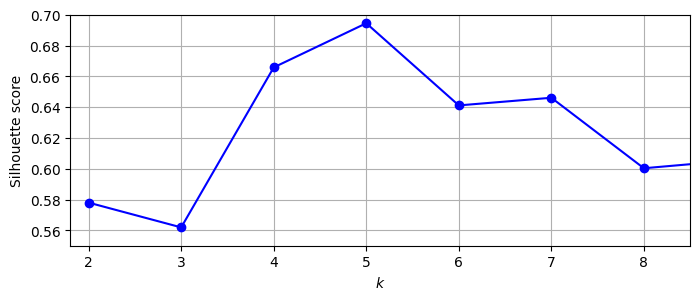

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

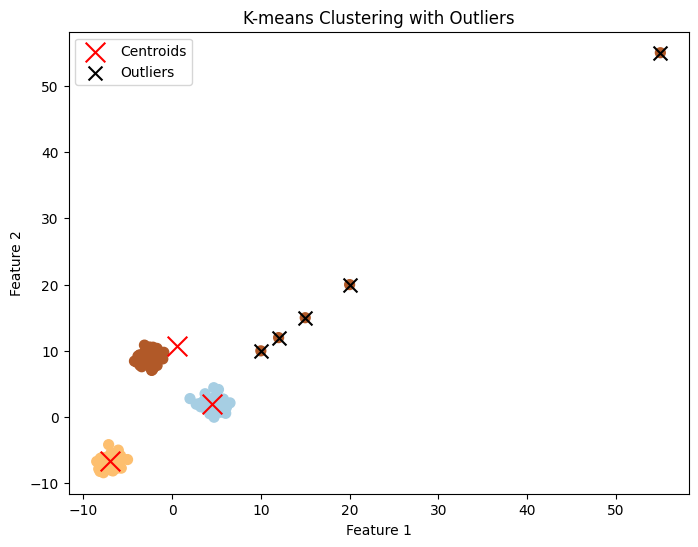

Cluster Centers (including outliers):
[[ 4.49951001  1.93892013]
 [-6.95170962 -6.67621669]
 [ 0.5460171  10.66194522]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. 데이터 생성
# 정상적인 데이터 (100개)
X_normal, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

# 2. 이상치 추가
# 이상치 (5개)
outliers = np.array([[10, 10], [12, 12], [15, 15], [20, 20], [55, 55]])

# 3. 정상적인 데이터와 이상치를 합침
X = np.vstack([X_normal, outliers])

# 4. K-means 군집화 (K=3, 군집의 수 3으로 설정)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 5. 군집화 결과
y_kmeans = kmeans.predict(X)

# 6. 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap=plt.cm.Paired, s=50, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')

# 이상치 데이터는 다른 색상으로 강조
plt.scatter(outliers[:, 0], outliers[:, 1], c='black', marker='x', s=100, label='Outliers')

plt.title("K-means Clustering with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 군집 중심점 출력
print("Cluster Centers (including outliers):")
print(kmeans.cluster_centers_)


### 실습문제

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# 아이리스 데이터셋 불러오기
# 아이리스 데이터셋 로드
iris = load_iris()
X = iris.data

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# 레이블 데이터
labels = iris.target
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


k=2, 실루엣 스코어=0.681
k=3, 실루엣 스코어=0.551
k=4, 실루엣 스코어=0.498
k=5, 실루엣 스코어=0.493
k=6, 실루엣 스코어=0.368
k=7, 실루엣 스코어=0.354
k=8, 실루엣 스코어=0.345
k=9, 실루엣 스코어=0.316
k=10, 실루엣 스코어=0.301


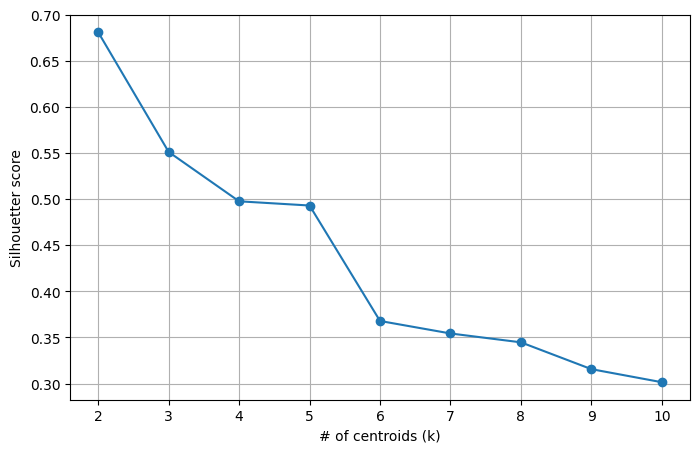

In [ ]:


# 클러스터 개수에 따른 실루엣 스코어 저장 리스트
silhouette_scores = []

# 클러스터 개수를 2부터 10까지 변화시키며 K-Means 적용 및 실루엣 스코어 계산
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'k={k}, 실루엣 스코어={score:.3f}')

# 클러스터 개수에 따른 실루엣 스코어 변화 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('# of centroids (k)')
plt.ylabel('Silhouetter score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

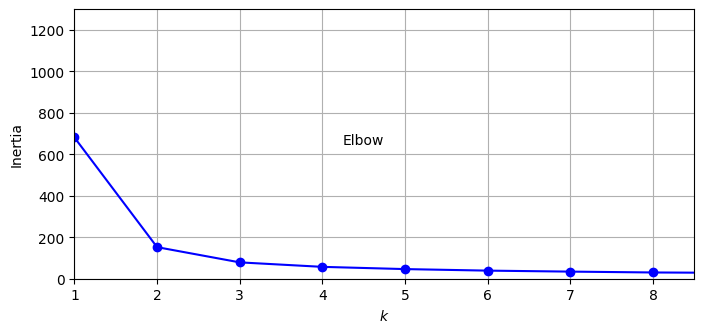

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()